In [8]:
import numpy as np
from scipy.fftpack import fft 
import matplotlib.pyplot as plt
import math

In [9]:
fs = 1024
f = 20
time = np.arange(0, fs*2)/fs
sin_f = np.sin(2*np.pi*f*time)
np.random.seed(44)
noise = np.random.randn(len(time))/100
signal_s = sin_f+noise

In [10]:
signal_s.shape

(2048,)

<IPython.core.display.Javascript object>


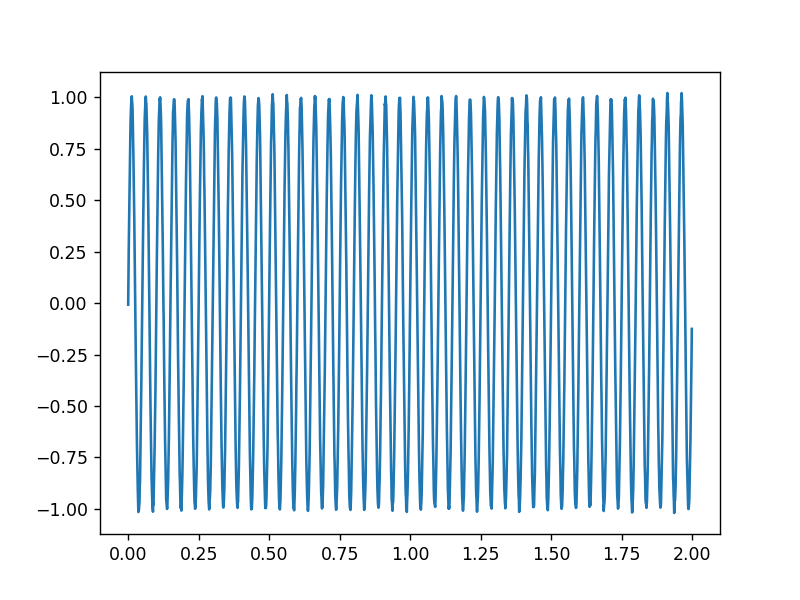

In [11]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(time, signal_s)

In [12]:
math.sqrt(np.sum((sin_f*sin_f))/len(sin_f))

0.7071067811865476

In [13]:
1/math.sqrt(2)

0.7071067811865475

In [14]:
xk = abs(fft(sin_f))

In [15]:
xk

array([3.47635866e-14, 1.57225334e-14, 7.55170245e-14, ...,
       3.84356092e-14, 7.55170245e-14, 1.57225334e-14])

In [16]:
np.sum(xk*xk)/len(xk)

1024.0

In [17]:
np.sum(sin_f*sin_f)

1024.0000000000002

In [18]:
from scipy import signal

In [19]:
f, t, Sxx = signal.spectrogram(signal_s, fs, noverlap=128, nperseg=256, window="hann", 
                               mode='complex', return_onesided=False, scaling='spectrum')

In [20]:
f1, t1, Sxx1 = signal.spectrogram(signal_s, fs, noverlap=128, nperseg=256, window="hann", 
                               mode='magnitude', return_onesided=False, scaling='spectrum')

In [21]:
f2, t2, Sxx2 = signal.spectrogram(signal_s, fs, noverlap=128, nperseg=256, window="hann", 
                               mode='psd', return_onesided=False, scaling='spectrum')

In [28]:
abs(Sxx).argmax()

78

In [27]:
Sxx1.argmax()

78

In [26]:
Sxx2.argmax()

78

In [32]:
hann = signal.get_window('hann', 256)

In [176]:
Sxx.shape

(256, 15)

In [177]:
8000/128

62.5

In [29]:
abs(Sxx[:,-1]).max()

0.49967316191790057

In [30]:
np.sum(abs(Sxx[:,0])*abs(Sxx[:,0]))

0.7501829927698098

In [33]:
signal_window = signal_s[:256]*hann

In [35]:
np.sum(signal_window*signal_window)

48.01171892563038

In [36]:
np.sum(abs(fft(signal_window))*abs(fft(signal_window)))/len(signal_window)

48.01171892563038

<IPython.core.display.Javascript object>


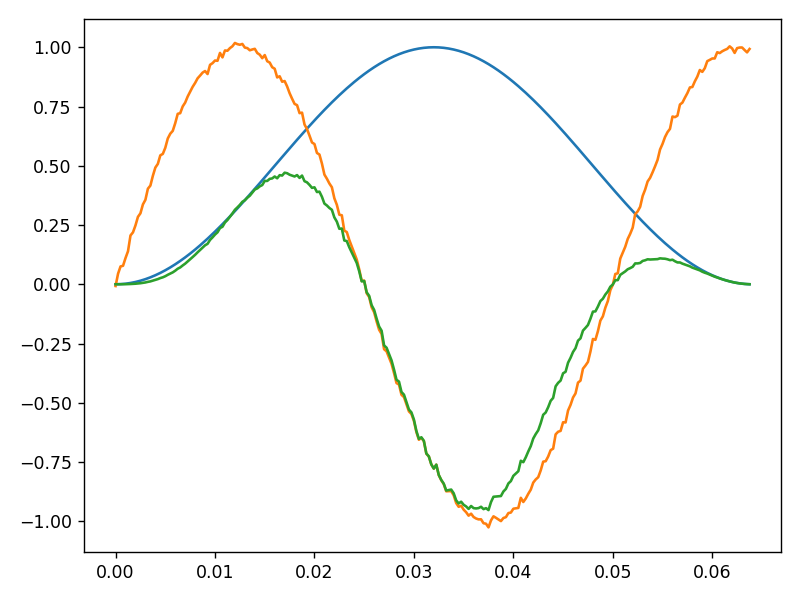

In [121]:
fig, ax = plt.subplots()
ax.plot(time[:len(signal_window)], signal.get_window('hann', 256))
ax.plot(time[:len(signal_window)], signal_s[:len(signal_window)])
ax.plot(time[:len(signal_window)], signal_window)
fig.tight_layout()

In [184]:
abs(fft(signal_window)).max()

64.02352231235056

In [195]:
(abs(Sxx[:,0])*128).max()

64.02352231235056

In [196]:
abs(Sxx).shape

(256, 15)

<IPython.core.display.Javascript object>


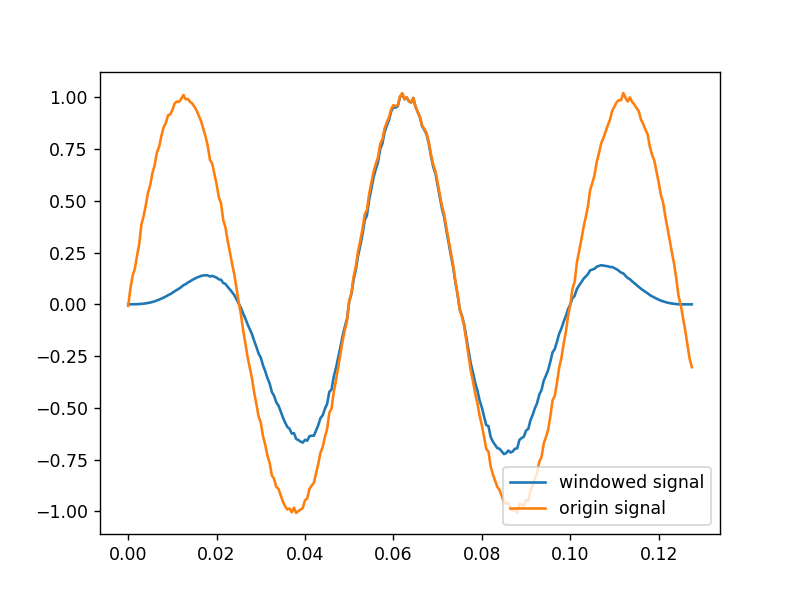

In [214]:
fs=2000
f=20
time = np.arange(0, fs*2)/fs
sin_f = np.sin(2*np.pi*f*time)
np.random.seed(44)
noise = np.random.randn(len(time))/100
signal_s = sin_f+noise
hann = signal.get_window('hann', 256)
signal_window = signal_s[:256]*hann
fig, ax = plt.subplots()
ax.plot(time[:256], signal_window, label="windowed signal")
ax.plot(time[:256], signal_s[:256], label="origin signal")
ax.legend(loc=4)

In [40]:
rms_in_time = math.sqrt(np.sum(signal_s[:256]*signal_s[:256])/len(signal_s[:256]))
print("expected value is 0.707, calculated value is {}".format(rms_in_time))

expected value is 0.707, calculated value is 0.707554253324911


In [41]:
rms_in_time = math.sqrt(np.sum(signal_window[:256]*signal_window[:256])/len(signal_window[:256]))
print("calculated value is {}".format(rms_in_time))

calculated value is 0.4330655574543463


In [45]:
f, t, Sxx = signal.spectrogram(signal_s, fs, noverlap=128, nperseg=256, window="hann", 
                               mode='magnitude', return_onesided=False, scaling='spectrum')

In [46]:
math.sqrt(np.sum((Sxx[:,0]/2)*(Sxx[:,0]/2)))

0.4330655241328412

In [223]:
fs=8
f=1
time=np.arange(0, fs*1)/fs
sin_f = np.sin(2*np.pi*f*time)
xk=fft(sin_f)
print("xf series loos like: \n{}".format(abs(xk)))

xf series loos like: 
[1.14423775e-17 4.00000000e+00 1.65298365e-16 9.95799250e-17
 2.33486982e-16 9.95799250e-17 1.65298365e-16 4.00000000e+00]
